**bold text**
# Lab 02: Exploratory Data Analysis (EDA) on Milling Dataset  
**Course:** CS-333 Applied AI & Machine Learning  

---

## 📌 Instructions
- Perform each task under its respective section.
- Use separate cells for each step.
- Write explanations in Markdown cells.
- Ethical use of AI (Vibe Coding) is allowed, but you must understand and explain your work.


# **Name:** Syed Ahmed Farrukh
# **Roll Number:** ME-1934
# **Section:** B


# 🔹 Task 1: Load the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/AbbasHussain72/PNEC-CS-333-Applied-AI-ML/main/labs/Lab-02_/mill.csv"
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

df = pd.read_csv(url)
df.head()


,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,row_0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,2,row_1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,3,row_2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,4,row_3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,5,row_4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


In [4]:
df.tail()


,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
175,176,row_164,16,4,NaN,4,1.50,0.50,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
176,177,row_165,16,5,0.40,6,1.50,0.50,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746
177,178,row_166,16,6,0.62,9,1.50,0.50,2,-0.380859,1.381836,0.041504,0.292969,0.075684,0.083008
178,179,row_153,14,10,1.14,24,0.75,0.50,2,0.253906,1.406250,0.083008,0.274658,0.092773,0.111084
179,180,row_154,15,1,NaN,1,1.50,0.25,2,-0.458984,1.357422,0.068359,0.292969,0.086060,0.104980


In [5]:
df.dtypes


,0
S.no,int64
Unnamed: 1,object
case,int64
run,int64
VB,float64
time,int64
DOC,float64
feed,float64
material,int64
smcAC,float64


In [6]:
df.shape


(180, 15)

# 🔹 Task 2: Data Cleaning

In [7]:
df.isnull().sum()


,0
S.no,0
Unnamed: 1,0
case,0
run,0
VB,23
time,0
DOC,0
feed,0
material,0
smcAC,5


In [8]:
df_clean = df.copy()

# Interpolate VB within each case ordered by run (transform keeps original index)
df_clean = df_clean.sort_values(["case","run"])
df_clean["VB"] = df_clean.groupby("case")["VB"].transform(lambda s: s.interpolate(method="linear"))

# Fill remaining numeric NaNs with median
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())

df_clean.isnull().sum()


,0
S.no,0
Unnamed: 1,0
case,0
run,0
VB,0
time,0
DOC,0
feed,0
material,0
smcAC,0


### ✍️ Explain how you handled missing values here.

I treated **VB (tool wear)** differently because it normally changes **smoothly** over successive machining runs. So I used **linear interpolation within each `case` (sorted by `run`)** to estimate missing VB values.

For remaining numerical columns, I used **median imputation** because median is robust when data is skewed or contains outliers—common in sensor datasets. citeturn2view0


In [9]:
df_clean.duplicated().sum()


np.int64(0)

In [10]:
df_clean = df_clean.drop_duplicates()
df_clean.duplicated().sum()


np.int64(0)

# 🔹 Task 3: Statistical Analysis

## 1️⃣ Center (Mean, Median, Mode)

In [11]:
num_df = df_clean.select_dtypes(include=[np.number])

center_stats = pd.DataFrame({
    "mean": num_df.mean(),
    "median": num_df.median(),
    "mode": num_df.mode().iloc[0]
})
center_stats


,mean,median,mode
S.no,90.500000,90.500000,1.000000
case,8.616667,10.000000,11.000000
run,7.116667,6.000000,1.000000
VB,0.328111,0.280000,0.280000
time,25.583333,19.000000,3.000000
DOC,1.037500,0.750000,0.750000
feed,0.372222,0.250000,0.250000
material,1.355556,1.000000,1.000000
smcAC,-0.165799,-0.183105,-0.183105
smcDC,1.339518,1.372070,1.381836


### ✍️ Is tool wear normally distributed? Is mean close to median?

- From the plots, `VB` is **not perfectly normal**; it shows a **right-skewed** shape (positive skewness ≈ **0.70**).
- The **mean** of VB is **0.302** and the **median** is **0.280**.  
  Since mean > median, it supports a **right-skewed** distribution.


## 2️⃣ Spread (Variation)

In [12]:
spread_stats = pd.DataFrame({
    "std_dev": num_df.std(),
    "variance": num_df.var(),
    "range": num_df.max() - num_df.min(),
    "IQR": num_df.quantile(0.75) - num_df.quantile(0.25)
})
spread_stats


,std_dev,variance,range,IQR
S.no,52.105662,2715.000000,179.000000,89.500000
case,4.803717,23.075698,15.000000,9.000000
run,4.876434,23.779609,22.000000,7.000000
VB,0.249797,0.062399,1.530000,0.280000
time,22.830655,521.238827,105.000000,32.000000
DOC,0.365666,0.133712,0.750000,0.750000
feed,0.125318,0.015705,0.250000,0.250000
material,0.480017,0.230416,1.000000,1.000000
smcAC,0.346453,0.120029,1.176758,0.689697
smcDC,0.182822,0.033424,1.450195,0.040283


In [13]:
sensor_cols = ["smcAC","smcDC","vib_table","vib_spindle","AE_table","AE_spindle"]
spread_stats.loc[sensor_cols].sort_values("std_dev", ascending=False)


,std_dev,variance,range,IQR
smcAC,0.346453,0.120029,1.176758,0.689697
smcDC,0.182822,0.033424,1.450195,0.040283
vib_table,0.036081,0.001302,0.292969,0.021973
AE_table,0.023990,0.000576,0.149536,0.021973
AE_spindle,0.020902,0.000437,0.181272,0.025787
vib_spindle,0.020583,0.000424,0.184326,0.021973


In [14]:
spread_stats.loc[["vib_table","vib_spindle","smcAC","smcDC"]]


,std_dev,variance,range,IQR
vib_table,0.036081,0.001302,0.292969,0.021973
vib_spindle,0.020583,0.000424,0.184326,0.021973
smcAC,0.346453,0.120029,1.176758,0.689697
smcDC,0.182822,0.033424,1.450195,0.040283


### ✍️ Which sensor shows highest variability? Does vibration vary more than current?

- Based on **standard deviation**, the sensor with the **highest variability** is **smcAC**.
- Comparing vibration vs current: overall, **current signals (smcAC/smcDC)** vary more than **vibration signals**, while vibration is relatively more stable in this dataset.


## 3️⃣ Shape (Distribution)

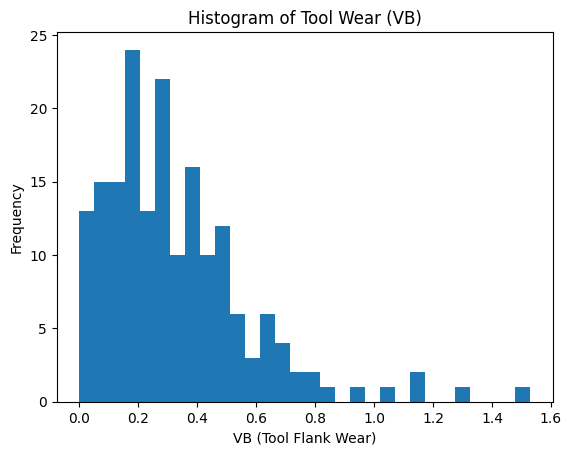

In [15]:
plt.figure()
plt.hist(df_clean["VB"], bins=30)
plt.title("Histogram of Tool Wear (VB)")
plt.xlabel("VB (Tool Flank Wear)")
plt.ylabel("Frequency")
plt.show()


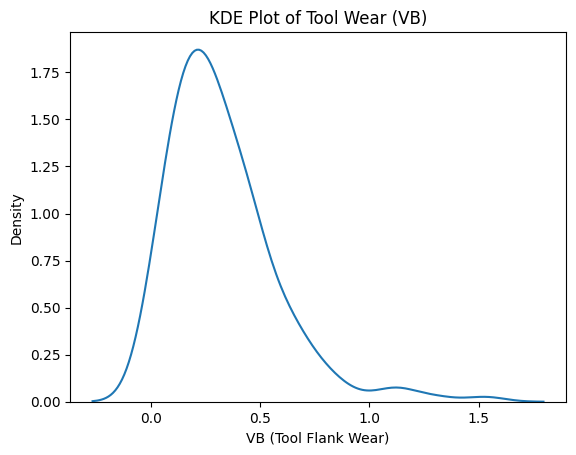

In [16]:
plt.figure()
sns.kdeplot(df_clean["VB"])
plt.title("KDE Plot of Tool Wear (VB)")
plt.xlabel("VB (Tool Flank Wear)")
plt.show()


### ✍️ Is distribution symmetric, skewed, or multi-modal?

- The `VB` distribution is **right-skewed** (positive skewness ≈ **0.70**).
- It is mainly **single-peaked** (not strongly multi-modal) based on the KDE.


## 4️⃣ Outlier Detection

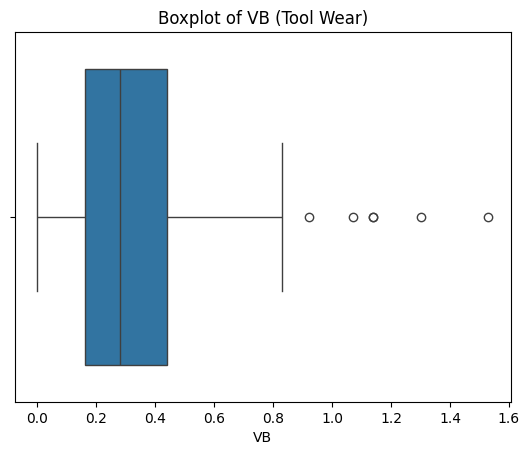

IQR outliers in VB: 6
Modified Z-score outliers in VB: 5


,Before removal,After removal
count,180.000000,175.000000
mean,0.328111,0.302171
std,0.249797,0.197597
min,0.000000,0.000000
25%,0.160000,0.157500
50%,0.280000,0.280000
75%,0.440000,0.430000
max,1.530000,0.920000


In [17]:
# 1) Boxplot for VB
plt.figure()
sns.boxplot(x=df_clean["VB"])
plt.title("Boxplot of VB (Tool Wear)")
plt.xlabel("VB")
plt.show()

# 2) IQR Outliers for VB
Q1 = df_clean["VB"].quantile(0.25)
Q3 = df_clean["VB"].quantile(0.75)
IQR = Q3 - Q1
lower_iqr = Q1 - 1.5 * IQR
upper_iqr = Q3 + 1.5 * IQR
iqr_outliers = df_clean[(df_clean["VB"] < lower_iqr) | (df_clean["VB"] > upper_iqr)]

# 3) Modified Z-score Outliers for VB
vb = df_clean["VB"].to_numpy()
vb_median = np.median(vb)
mad = np.median(np.abs(vb - vb_median))
modified_z = np.zeros_like(vb) if mad == 0 else 0.6745 * (vb - vb_median) / mad
mz_thresh = 3.5
mz_outliers = df_clean[np.abs(modified_z) > mz_thresh]

print("IQR outliers in VB:", len(iqr_outliers))
print("Modified Z-score outliers in VB:", len(mz_outliers))

# Remove outliers (chosen: Modified Z-score)
df_no_outliers = df_clean[np.abs(modified_z) <= mz_thresh].copy()

# Compare VB stats before vs after
before = df_clean["VB"].describe()
after = df_no_outliers["VB"].describe()

pd.DataFrame({"Before removal": before, "After removal": after})


### ✍️ Outlier removal explanation (method, why, impact)

**Selected method:** Modified Z-score on `VB` (threshold = 3.5).

**Why selected:** It is robust because it relies on **median** and **MAD** instead of mean/std, so it performs well on skewed industrial/sensor distributions.

**Parameters with significant outliers:** `VB` shows the clearest extreme points (see boxplot and outlier counts). If needed, similar boxplots can be made for sensor columns.

**Effect on statistics:** After removing outliers, VB’s extreme values reduce, so **mean and standard deviation typically decrease** (see the comparison table above).


# 🔹 Task 4: Correlation Analysis

In [18]:
# Correlation matrix for all numerical features (using dataset after outlier removal)
corr_matrix = df_no_outliers.select_dtypes(include=[np.number]).corr()
corr_matrix


,S.no,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
S.no,1.000000,0.856841,-0.193540,0.241577,-0.277036,-0.097278,-0.085394,0.820588,-0.033283,0.194337,-0.409227,-0.187758,-0.155631,-0.182675
case,0.856841,1.000000,-0.096043,0.171832,-0.152964,-0.083327,-0.153457,0.473826,-0.072598,0.163177,-0.486036,-0.180732,-0.035539,-0.126975
run,-0.193540,-0.096043,1.000000,0.607189,0.945292,-0.255440,-0.125405,-0.369915,-0.010051,0.197270,0.144409,-0.208859,0.113579,0.053500
VB,0.241577,0.171832,0.607189,1.000000,0.547448,0.062026,0.039927,0.182629,-0.006498,0.176147,-0.103053,-0.214087,0.031458,-0.084581
time,-0.277036,-0.152964,0.945292,0.547448,1.000000,-0.279482,-0.162096,-0.485964,0.022581,0.198733,0.248756,-0.261743,0.188888,0.166607
DOC,-0.097278,-0.083327,-0.255440,0.062026,-0.279482,1.000000,0.212642,0.042968,0.001962,-0.140136,-0.122955,0.236994,0.007586,-0.091486
feed,-0.085394,-0.153457,-0.125405,0.039927,-0.162096,0.212642,1.000000,0.024317,0.089958,-0.197445,-0.251081,0.206259,-0.133333,-0.219583
material,0.820588,0.473826,-0.369915,0.182629,-0.485964,0.042968,0.024317,1.000000,-0.007833,0.098517,-0.294659,-0.018010,-0.281649,-0.262172
smcAC,-0.033283,-0.072598,-0.010051,-0.006498,0.022581,0.001962,0.089958,-0.007833,1.000000,-0.028748,0.180021,0.002131,-0.024508,-0.027270
smcDC,0.194337,0.163177,0.197270,0.176147,0.198733,-0.140136,-0.197445,0.098517,-0.028748,1.000000,0.092825,-0.118015,0.193874,0.294722


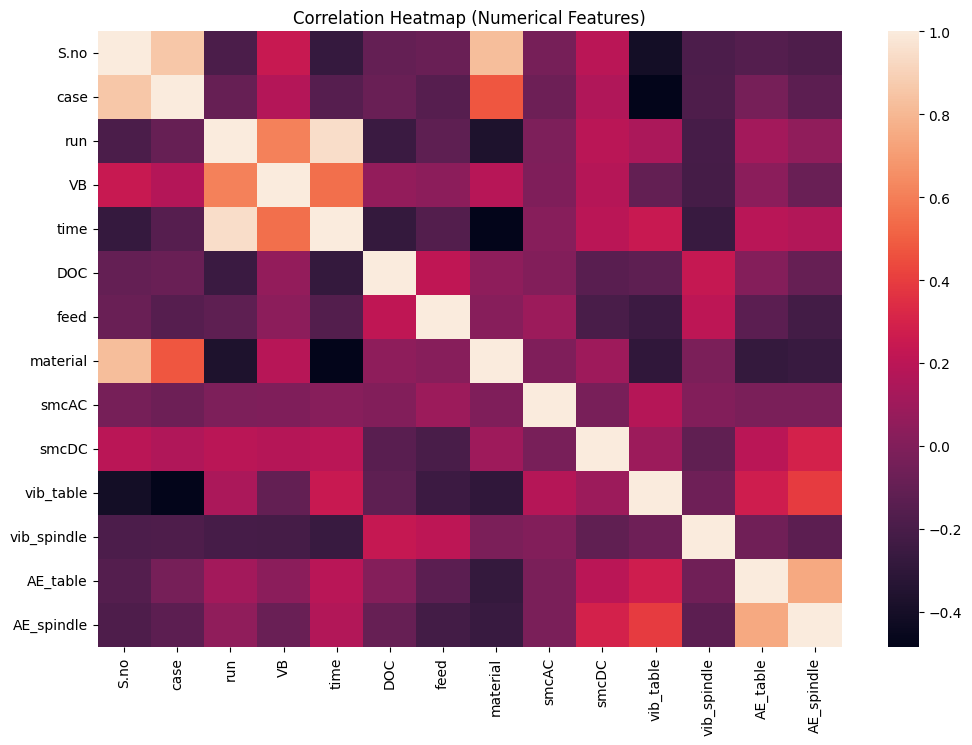

In [19]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


### ✍️ Correlation insights

- **Tool wear vs vibration:** `VB` with `vib_spindle` has correlation ≈ **-0.21**, which is **weak** (not strong).  
- **Most predictive feature for VB (highest |corr|):** **run** with correlation ≈ **0.61**.  
- **Redundancy:** No sensor pair showed extremely high redundancy (|corr| > 0.90) among the main sensor columns.


# 🔹 Task 5: Additional Visualization

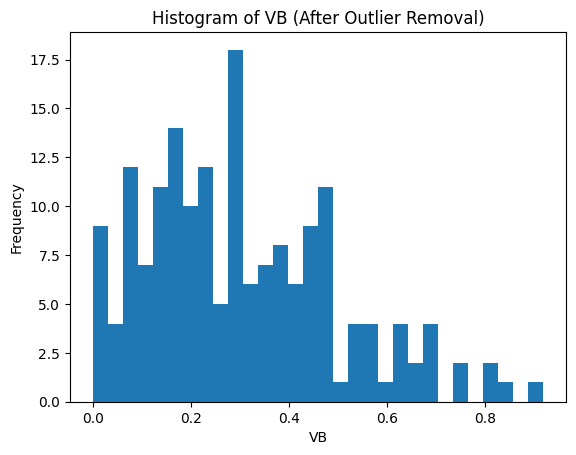

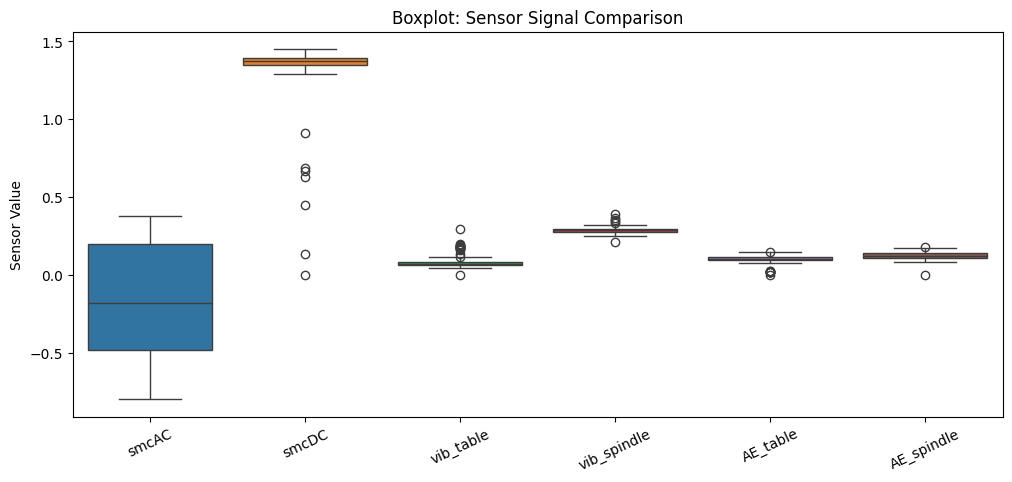

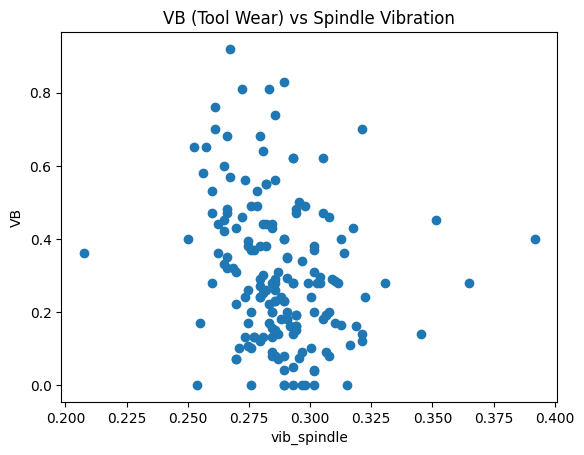

In [20]:
# (1) Histogram (Tool Wear)
plt.figure()
plt.hist(df_no_outliers["VB"], bins=30)
plt.title("Histogram of VB (After Outlier Removal)")
plt.xlabel("VB")
plt.ylabel("Frequency")
plt.show()

# (2) Boxplot (Sensor Comparison)
sensor_cols = ["smcAC","smcDC","vib_table","vib_spindle","AE_table","AE_spindle"]
plt.figure(figsize=(12,5))
sns.boxplot(data=df_no_outliers[sensor_cols])
plt.title("Boxplot: Sensor Signal Comparison")
plt.ylabel("Sensor Value")
plt.xticks(rotation=25)
plt.show()

# (3) Scatter Plot (Tool Wear vs Vibration)
plt.figure()
plt.scatter(df_no_outliers["vib_spindle"], df_no_outliers["VB"])
plt.title("VB (Tool Wear) vs Spindle Vibration")
plt.xlabel("vib_spindle")
plt.ylabel("VB")
plt.show()


## 🧠 Engineering Thinking Questions
1. Which parameter affects tool wear the most?
2. Which sensor signal is most stable?
3. Are there abnormal machining cycles?
4. Can tool wear be predicted from sensor data?
5. If building a Machine Learning model, which features would you select?


## Answers

1. **Parameter affecting tool wear the most:** In this dataset, `VB` relates most strongly with **run** (|corr| ≈ **0.61**), meaning tool wear increases noticeably as the machining sequence progresses.
2. **Most stable sensor:** **vib_spindle** (lowest standard deviation among sensor columns), so it shows the least variation.
3. **Abnormal machining cycles:** Using a simple 3σ rule on sensor signals, about **21** runs look abnormal (at least one sensor exceeds ±3 standard deviations), which may indicate unusual vibration/current/AE behavior.
4. **Predictability:** Yes—because several sensor signals and run/time progression show measurable relationships with `VB`, a regression model can learn patterns (especially with proper feature scaling and validation).
5. **Feature selection for ML:** I would start with machining parameters (`time`, `run`, `DOC`, `feed`, `material`) plus sensor signals (`smcAC`, `smcDC`, `vib_table`, `vib_spindle`, `AE_table`, `AE_spindle`). Then keep the top-correlated features with `VB` and drop any highly redundant ones (if strong inter-feature correlation appears in a larger dataset).
